# Quick start tutorial on photometry pipeline

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import astropy
import matplotlib.pylab as plt
%matplotlib inline

# Adding the library
import sys
#sys.path.remove('/Users/gks/Dropbox/mypylib')
sys.path.append("../src/")
import fitsimg
from photpipeline import PhotoMetryImage, PhotoMetryPipeLine

/Users/gks/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Read in filenames

In [2]:
import glob
basefolder = "../data/sample_data/"
regex = "*.fits"
filenames = glob.glob(basefolder + regex)
filenames

['../data/sample_data/science_2x2_binning_sdssi_fast_diff.0188.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0189.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0190.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0191.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0192.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0193.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0194.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0195.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0196.fits',
 '../data/sample_data/science_2x2_binning_sdssi_fast_diff.0197.fits']

# Example of reading one frame with PhotoMetryImage

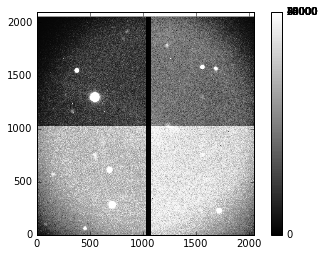

In [3]:
PMI = PhotoMetryImage(filenames[0])
PMI.plot()

### Plotting aperture locations

#### Step 1: Getting the initial X and Y positions of the target and reference stars.
Go to AIJ and only look at the first frame in the dataset using the DataProcessor.

#### Step 2: Save the datatable and overview image
This can be found under "data/" for the first image in the test sequence

#### Step 3: Load the dataframe

In [4]:
df_pos = pd.read_csv("../data/aij_positions_measurements.txt",sep="\t")
df_pos

,,Label,slice,Saturated,J.D.-2400000,JD_UTC,JD_SOBS,HJD_UTC,BJD_TDB,AIRMASS,...,Source_SNR_C7,Peak_C7,Mean_C7,Sky/Pixel_C7,Width_C7,X-Width_C7,Y-Width_C7,Angle_C7,Roundness_C7,Variance_C7
0,1,Processed_science_2x2_binning_sdssi_fast_diff....,0.0,0.0,57863.610429,2.457864e+06,2.457864e+06,2.457864e+06,2.457864e+06,1.593219,...,53.354312,886.0,784.833967,755.585695,31.003185,30.537681,31.468689,57.149881,0.994677,811.567452


In [5]:
# Get the x and y array positions for the target and the reference stars
# Idea: Change this into a function ?
NUMREFSTARS = 6
stars = ["T1"] + ["C"+str(i+2) for i in range(NUMREFSTARS)]
xx = df_pos[["X(FITS)_"+star for star in stars]].ix[0].values
yy = df_pos[["Y(FITS)_"+star for star in stars]].ix[0].values

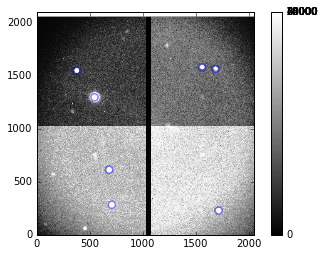

In [6]:
# Perform photometry on one image and plot the apertures
df_photometry_one_image = PMI.perform_photometry_window_centroid(xcen=xx,ycen=yy)
PMI.plot_apertures()

In [7]:
df_photometry_one_image

,Label,JD_UTC,JD_SOBS,AIRMASS,TELAZ,TELALT,TELROT,X(FITS)_T1,Y(FITS)_T1,Sky/Pixel_T1,...,Source-Sky_C6,Peak_C6,X(FITS)_C7,Y(FITS)_C7,Sky/Pixel_C7,Source-Sky_C7,Peak_C7,tot_C_cnts,rel_flux_T1,Saturated
1,science_2x2_binning_sdssi_fast_diff.0188.fits,2.457864e+06,2.457864e+06,1.600165,58.09275,58.09275,-18.325643,544.224715,1294.752822,746.444884,...,152493.822531,946.0,1681.673108,1562.393907,755.751114,99899.712811,886.0,4.728715e+06,9.390467,0.0


# Running PhotoMetryPipeLine

### Start pipeline

In [14]:
PMPL = PhotoMetryPipeLine(filenames,xcenters=xx,ycenters=yy,r_aper=40.,r_annulus1=60.,r_annulus2=70.)
# Run the pipeline
df_results = PMPL.run_pipeline(remove_cosmics=False)

Analyzing file # 0 science_2x2_binning_sdssi_fast_diff.0188.fits with r= 40.0 60.0 70.0
Analyzing file # 1 science_2x2_binning_sdssi_fast_diff.0189.fits with r= 40.0 60.0 70.0
Analyzing file # 2 science_2x2_binning_sdssi_fast_diff.0190.fits with r= 40.0 60.0 70.0
Analyzing file # 3 science_2x2_binning_sdssi_fast_diff.0191.fits with r= 40.0 60.0 70.0
Analyzing file # 4 science_2x2_binning_sdssi_fast_diff.0192.fits with r= 40.0 60.0 70.0
Analyzing file # 5 science_2x2_binning_sdssi_fast_diff.0193.fits with r= 40.0 60.0 70.0
Analyzing file # 6 science_2x2_binning_sdssi_fast_diff.0194.fits with r= 40.0 60.0 70.0
Analyzing file # 7 science_2x2_binning_sdssi_fast_diff.0195.fits with r= 40.0 60.0 70.0
Analyzing file # 8 science_2x2_binning_sdssi_fast_diff.0196.fits with r= 40.0 60.0 70.0
Analyzing file # 9 science_2x2_binning_sdssi_fast_diff.0197.fits with r= 40.0 60.0 70.0


In [16]:
# Save as a csv file
PMPL.save_photometry()

Saved file to: phot_results_40.0_60.0_70.0.csv


In [15]:
# df_results is in the same format as AIJ to make it easier to analyze it in AIJ
df_results

,Label,JD_UTC,JD_SOBS,AIRMASS,TELAZ,TELALT,TELROT,X(FITS)_T1,Y(FITS)_T1,Sky/Pixel_T1,...,Source-Sky_C6,Peak_C6,X(FITS)_C7,Y(FITS)_C7,Sky/Pixel_C7,Source-Sky_C7,Peak_C7,tot_C_cnts,rel_flux_T1,Saturated
0,science_2x2_binning_sdssi_fast_diff.0188.fits,2.457864e+06,2.457864e+06,1.600165,58.092750,58.092750,-18.325643,544.224715,1294.752822,751.460828,...,154533.298122,946.0,1681.673108,1562.393907,756.008886,100258.562613,886.0,4.759368e+06,9.396127,0.0
1,science_2x2_binning_sdssi_fast_diff.0189.fits,2.457864e+06,2.457864e+06,1.598088,58.017941,58.017941,-18.313296,545.147739,1294.596065,747.321183,...,158058.079379,932.0,1682.844757,1562.443718,751.901476,101493.011376,887.0,4.777458e+06,9.348266,0.0
2,science_2x2_binning_sdssi_fast_diff.0190.fits,2.457864e+06,2.457864e+06,1.596022,57.942722,57.942722,-18.301307,544.907637,1293.166171,744.012274,...,154733.521087,930.0,1682.553260,1561.497242,748.008494,101100.196331,1114.0,4.763510e+06,9.392783,0.0
3,science_2x2_binning_sdssi_fast_diff.0191.fits,2.457864e+06,2.457864e+06,1.594145,57.874245,57.874245,-18.291243,544.495822,1295.406273,740.642810,...,154524.508051,931.0,1682.118459,1563.437522,744.926177,98259.700267,868.0,4.758227e+06,9.388312,0.0
4,science_2x2_binning_sdssi_fast_diff.0192.fits,2.457864e+06,2.457864e+06,1.592431,57.811144,57.811144,-18.282153,544.755147,1296.151243,737.422709,...,152654.037983,928.0,1682.427164,1563.990225,741.344418,99083.839028,864.0,4.754572e+06,9.399062,0.0
5,science_2x2_binning_sdssi_fast_diff.0193.fits,2.457864e+06,2.457864e+06,1.590894,57.754511,57.754511,-18.273661,545.685800,1295.466419,734.098020,...,153934.495702,927.0,1683.090702,1563.818395,737.876239,100200.326356,875.0,4.770955e+06,9.367985,65535.0
6,science_2x2_binning_sdssi_fast_diff.0194.fits,2.457864e+06,2.457864e+06,1.588859,57.678921,57.678921,-18.262493,545.078792,1295.267156,731.244766,...,154736.032644,926.0,1682.595348,1563.210155,734.915475,99546.356652,857.0,4.764377e+06,9.371623,0.0
7,science_2x2_binning_sdssi_fast_diff.0195.fits,2.457864e+06,2.457864e+06,1.586830,57.603402,57.603402,-18.241019,544.918228,1296.197873,727.448212,...,156959.606475,927.0,1682.575726,1564.535832,731.697236,101897.653748,2045.0,4.771160e+06,9.379295,0.0
8,science_2x2_binning_sdssi_fast_diff.0196.fits,2.457864e+06,2.457864e+06,1.585313,57.546559,57.546559,-18.243142,544.843736,1296.152268,724.300762,...,153321.561860,905.0,1682.393783,1564.308492,728.064174,102069.074491,858.0,4.765447e+06,9.384825,0.0
9,science_2x2_binning_sdssi_fast_diff.0197.fits,2.457864e+06,2.457864e+06,1.583296,57.470590,57.470590,-18.232474,545.609296,1295.221676,721.906760,...,152502.860668,920.0,1683.118960,1563.063384,725.579590,98043.248874,855.0,4.758008e+06,9.382711,0.0


# Features to add
#### Reduction: 
1. Create master flat
2. Create master dark
3. Create master bias

#### General photometry
- Make functions to cycle through / pick reference stars
- Add errorbars
- Add scintillation calculation
- Finish implementing cosmic ray rejection
- Add Howell centroiding

#### Plotting and diagnostic plots
- Plot the relative photometry with errorbars
- Plot the "Source-Sky" for the target star and all of the reference stars in a multi panel
— Plot X centroid and Y centroid for all of the

TODO:
- Take a closer look at other cool pipelines:
-- https://github.com/TGBeatty/MINERVAphot/blob/master/MINERVAphot.py
-- https://github.com/bmorris3/wasp85_q1_2017

